<a href="https://colab.research.google.com/github/victorhcunha/ArvoreDeDecisao/blob/main/arvorededecisaointerativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz #arvoredeDecisao e #renderizacao
from sklearn.model_selection import train_test_split #divisaoDadosDeTeste
from sklearn import metrics
import numpy as np
# Renderização gráfica
import pydot
import graphviz
# Renderização interativa
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [4]:
# Carregando a base de dados:
data = pd.read_csv('iris.data')
data.head()

# Mostrando informações da base de dados:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(data.drop("class",axis=1),data["class"],test_size=0.3)

# Mostrando a forma dos dados:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(105, 4) (45, 4)
(105,) (45,)


In [6]:


# Instânciando o objeto classificador:
classifier = DecisionTreeClassifier()

# Treinando o modelo de arvore de decisão:
classifier = classifier.fit(X_train,y_train)

# Verificando os atributos mais importantes/relevantes para o modelo treinado:
print(classifier.feature_importances_)

for feature,importancia in zip(data.columns,classifier.feature_importances_):
    print("{}:{}".format(feature, importancia))


[0.02158717 0.         0.0573602  0.92105263]
sepal length in cm:0.021587171052631582
sepal width in cm:0.0
petal length in cm:0.05736019736842106
petal width in cm:0.9210526315789475


In [7]:
# Executando o método predict:
resultado = classifier.predict(X_test)
print(resultado)

# Relatório de métricas:
print(metrics.classification_report(y_test,resultado))

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.89      0.94      0.92        18

  

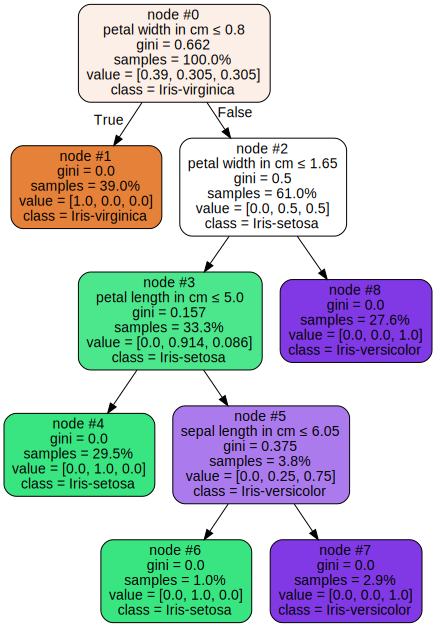

In [8]:
# Renderização de Árvore:
dot_data = export_graphviz( 
         classifier, 
         out_file=None,
         feature_names=data.drop('class',axis=1).columns,
         class_names=['Iris-virginica','Iris-setosa', 'Iris-versicolor'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )

graph = graphviz.Source(dot_data)  
graph

In [9]:
# Renderizando árvore interativa


# feature matrix
X,y = data.drop('class',axis=1),data['class']

# features
features_label = data.drop('class',axis=1).columns

# clases
class_label = ['Iris-virginica','Iris-setosa', 'Iris-versicolor']


def arvoreinterativa(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(arvoreinterativa 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…